# Polynomial Regression - Lab

## Introduction

In this lab you'll practice your knowledge on adding polynomial terms to your regression model! 

## Objectives

You will be able to:

- Understand how to account for non-linear relationships between predictors and target variable using polynomial terms

## Create the best plot using polynomials!

Here is a plot with a clearly non-linear shape. Begin to think about what degree polynomial you believe will fit it best.

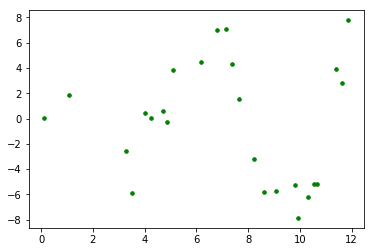

In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
np.random.seed(37)

def pol(x):
    return x * np.cos(x)

x = np.linspace(0, 12, 100)
rng = np.random.RandomState(1234)
rng.shuffle(x)
x = np.sort(x[:25])
y = pol(x) + np.random.randn(25)*2

plt.scatter(x, y, color='green', s=50, marker='.')

plt.show();

Now it's time to determine the optimal degree of polynomial features for a model that is fit to this data     
- Plot a polynomial function using `PolynomialFeatures` for polynomials up until the second, third and fourth degree. Make sure to label each degree polynomial in your plot.   
- Print out the $R^2$ value for each of the three results. Draw conclusions with respect to which degree is best.

## Solution

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd

Poly. Degree 1 R^2 score: 0.013560616969657602
Poly. Degree 2 R^2 score: 0.01370280327602913
Poly. Degree 3 R^2 score: 0.10777553894988867
Poly. Degree 4 R^2 score: 0.6975168808914506
Poly. Degree 5 R^2 score: 0.782654362783906
Poly. Degree 6 R^2 score: 0.897042080078039


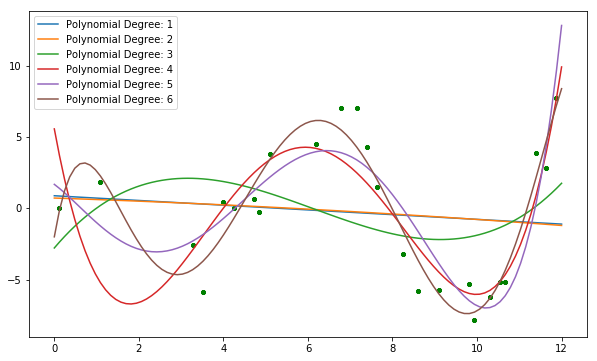

In [16]:
plt.figure(figsize=(10,6))
for n in (range(1,7)):
    poly = PolynomialFeatures(n)
    X_fin = poly.fit_transform(x.reshape(-1, 1))

    # Plot regression line
    reg_poly = LinearRegression().fit(X_fin, y)
    predict_X = reg_poly.predict(X_fin)
    X_linspace = pd.DataFrame(np.linspace(0,12,100))
    X_linspace_fin = poly.fit_transform(X_linspace)
    y_poly_pred = reg_poly.predict(X_linspace_fin)
    plt.scatter(x, y, color='green', s=50, marker='.')
    plt.plot(X_linspace,y_poly_pred, label=f"Polynomial Degree: {n}")
    plt.legend();

    # testing goodness of fit using R^2
    mean_squared_error(y, reg_poly.predict(X_fin))
    print(f"Poly. Degree {n} R^2 score: {r2_score(y, reg_poly.predict(X_fin))}")

## Summary

Great! You now know how to include polynomials in your linear model!